In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

## The data

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the data

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

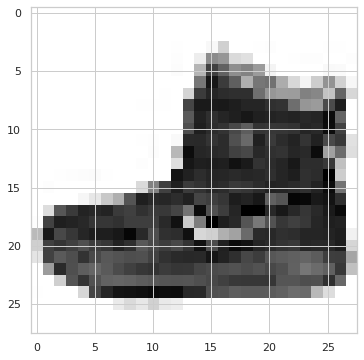

In [6]:
plt.imshow(x_train[0], cmap='Greys');

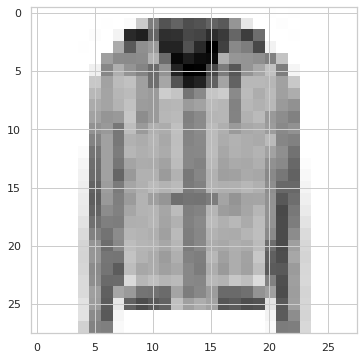

In [7]:
plt.imshow(x_train[28], cmap='Greys');

## Preprocessing the Data

**Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
x_train.max()

255

In [9]:
x_test.max()

255

In [10]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

**Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

## Building the Model

**Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

# Output layer for multiclass model
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Training the Model
**Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [24]:
model.fit(x_train, y_cat_train,
          epochs = 20, validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2546 - accuracy: 0.9049 - val_loss: 0.2818 - val_accuracy: 0.8990
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2399 - accuracy: 0.9114 - val_loss: 0.2781 - val_accuracy: 0.9032
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2251 - accuracy: 0.9166 - val_loss: 0.2825 - val_accuracy: 0.9010
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2155 - accuracy: 0.9186 - val_loss: 0.2791 - val_accuracy: 0.9037


### Evaluating the Model

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [25]:
losses = pd.DataFrame(model.history.history)

In [26]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.254624,0.904883,0.281818,0.8990
1,0.239854,0.911417,0.278104,0.9032
2,0.225145,0.916583,0.282488,0.9010
3,0.215455,0.918650,0.279063,0.9037


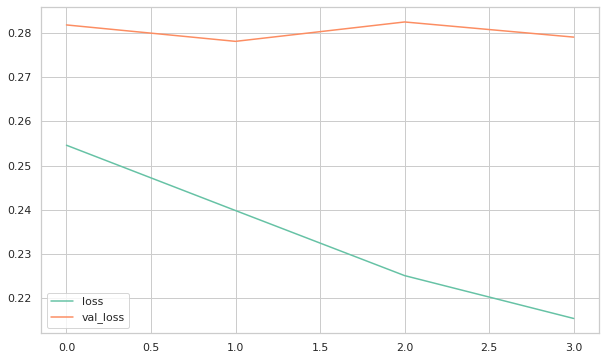

In [27]:
losses[['loss','val_loss']].plot();

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2791 - accuracy: 0.9037


[0.27906250953674316, 0.9036999940872192]

In [30]:
from sklearn.metrics import classification_report

In [32]:
preds = np.argmax(model.predict(x_test), axis=-1)

In [33]:
y_cat_test.shape

(10000, 10)

In [34]:
preds[0]

9

This should be compared to y_test! NOT y_cat_test.

In [35]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.85      0.85      1000
           3       0.93      0.90      0.91      1000
           4       0.82      0.89      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.70      0.72      0.71      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,preds)

array([[823,   0,  19,  13,   2,   1, 137,   0,   5,   0],
       [  2, 979,   2,   9,   3,   0,   3,   0,   2,   0],
       [ 13,   0, 854,   8,  64,   0,  61,   0,   0,   0],
       [ 15,   9,  13, 895,  31,   0,  36,   0,   1,   0],
       [  0,   1,  36,  15, 887,   0,  61,   0,   0,   0],
       [  0,   0,   0,   0,   0, 987,   0,  10,   1,   2],
       [ 85,   1,  75,  16,  88,   0, 724,   0,  11,   0],
       [  0,   0,   0,   0,   0,  19,   0, 971,   0,  10],
       [  2,   0,   2,   3,   4,   3,  10,   2, 974,   0],
       [  0,   0,   1,   0,   0,   7,   0,  48,   1, 943]])

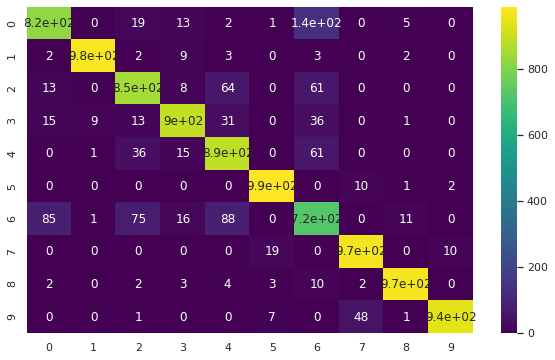

In [38]:
sns.heatmap(confusion_matrix(y_test,preds), annot=True, cmap='viridis');